F(0) = 0
F(1) = 1
F(2) = 1
F(3) = 2
F(4) = 3
F(5) = 5
F(6) = 8
F(7) = 13
F(8) = 21
F(9) = 34
Maximum value = 220


Matplotlib is building the font cache; this may take a moment.


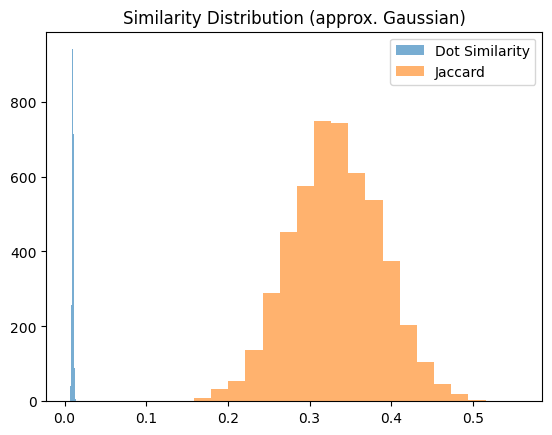

In [1]:
import numpy as np

def fib_matrix(n):
    """Compute nth Fibonacci using matrix exponentiation (O(log n))"""
    F = np.array([[1, 1], [1, 0]], dtype=object)

    def mat_pow(M, power):
        if power == 0:
            return np.identity(2, dtype=object)
        if power % 2 == 0:
            half = mat_pow(M, power // 2)
            return half @ half
        else:
            return M @ mat_pow(M, power - 1)

    return mat_pow(F, n)[0, 1]  # Fn

# Test
for i in range(10):
    print(f"F({i}) =", fib_matrix(i))

def knapsack(values, weights, W):
    """0/1 Knapsack using 1D DP (O(nW) time, O(W) space)"""
    n = len(values)
    dp = [0] * (W + 1)

    for i in range(n):
        for w in range(W, weights[i] - 1, -1):
            dp[w] = max(dp[w], dp[w - weights[i]] + values[i])
    return dp[W]

# Example
values = [60, 100, 120]
weights = [10, 20, 30]
W = 50
print("Maximum value =", knapsack(values, weights, W))

import matplotlib.pyplot as plt

# 1. Generate random binary vectors
N = 100  # vector length
M = 100  # number of vectors
vectors = np.random.randint(0, 2, size=(M, N))

# 2. Similarity functions
def sim_dot(x, y):
    return np.dot(x, y) / (np.sum(x) * np.sum(y) + 1e-9)

def jaccard(x, y):
    return np.sum(np.logical_and(x, y)) / (np.sum(np.logical_or(x, y)) + 1e-9)

# 3. Compute pairwise similarities
sims_dot, sims_jac = [], []
for i in range(M):
    for j in range(i+1, M):
        sims_dot.append(sim_dot(vectors[i], vectors[j]))
        sims_jac.append(jaccard(vectors[i], vectors[j]))

# 4. Plot distribution
plt.hist(sims_dot, bins=20, alpha=0.6, label='Dot Similarity')
plt.hist(sims_jac, bins=20, alpha=0.6, label='Jaccard')
plt.title("Similarity Distribution (approx. Gaussian)")
plt.legend()
plt.show()


In [ ]:
1.The matrix exponentiation Fibonacci algorithm runs in O(log n) time and O(1) space.
T(n)=T(n/2)+O(1)
→ 𝑎=1,𝑏=2,𝑓(𝑛)=𝑂(1)
a=1,b=2,f(n)=O(1)
So by Master Theorem:T(n)=O(log2​n)
2.Greedy algorithms pick items with best local choice (e.g., best value/weight ratio).
But this can fail for some combinations — you might skip a small item that later allows a better total value.

That’s why Knapsack needs Dynamic Programming (DP) — it explores optimal substructures and overlapping subproblems
3.Can we reduce space to O(W)?

Yes
By keeping only the previous row (1D array):
DP[w]=max(DP[w],DP[w−wi​]+vi​)
(iterating w backward from W to wi)

Space reduced from O(n × W) → O(W).
5.Capacity = how many distinct patterns can be stored/recognized before confusion occurs.
For sparse binary vectors, capacity grows combinatorially with N but depends on overlap between active bits.